****
## Note ##
**I will be using the training dataset and splitting that into training and testing subset**
****

In [230]:
import pandas as pd
import numpy as np

****
## Importing and Displaying the Dataset ##
****

In [231]:
df=pd.read_csv(r"C:\Imp\train.csv")

In [232]:
df

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489
...,...,...,...,...,...,...,...
7995,398.120876,7,Classical,135.550681,0.101345,1996,40.695441
7996,296.558875,7,Pop,133.586259,0.143948,2021,27.898666
7997,227.407953,4,Classical,62.616766,0.142943,1986,10.871648
7998,275.854318,5,Jazz,67.945166,0.182870,1993,11.234010


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


****
## Data Visualization ##
****

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

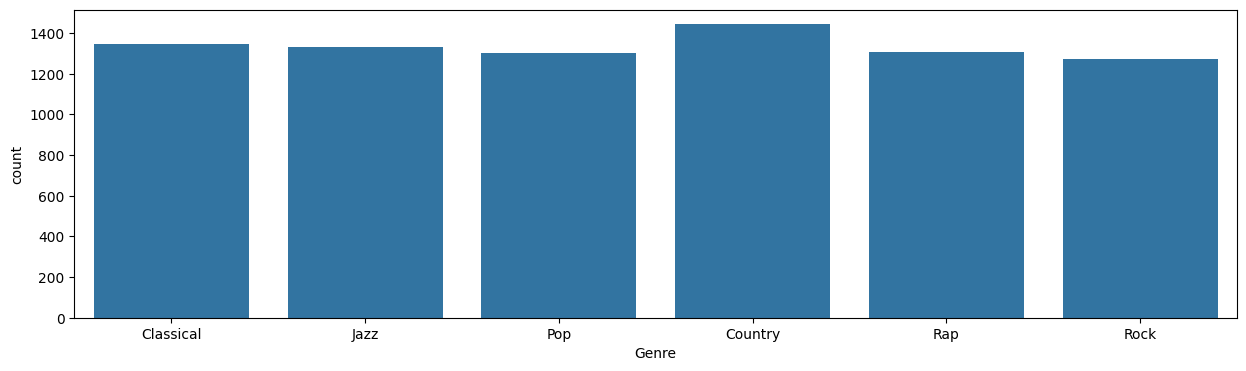

In [235]:
# We have one categorical column, let us visualize its distribution
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Genre')
plt.show()

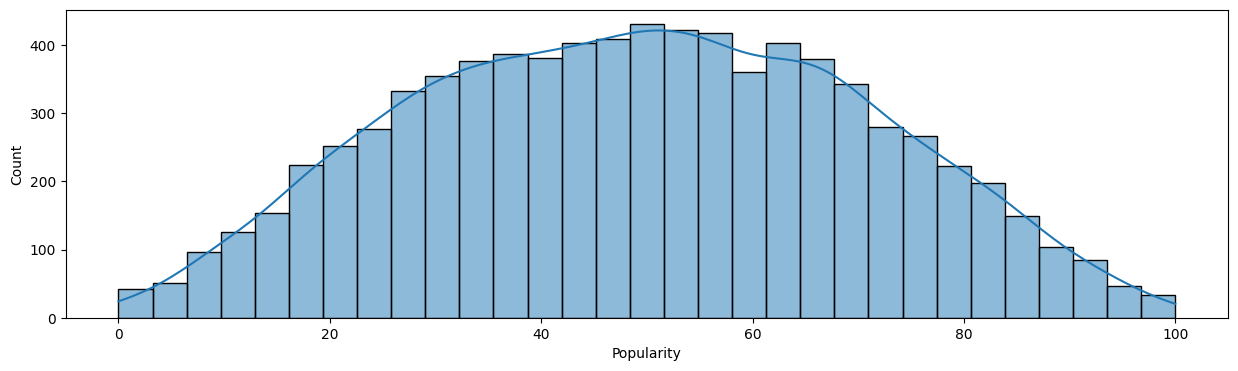

In [236]:
# Let us look at how our target variable (Popularity) is distributed
plt.figure(figsize=(15,4))
sns.histplot(data=df,x='Popularity',kde=True)
plt.show()

**Findings:**

**The distribution of song popularity follows a normal distribution. Most songs fall within a popularity score of 50-60, indicating that the majority of songs achieve moderate success.**

**According to the Empirical Rule: (As it follows Normal Distribution)**

-> 68% of the songs have popularity within 1 standard deviation from the mean, likely ranging from 40 to 70.'

-> 95% of the songs fall within 30 to 80, indicating that songs with extreme popularity scores (either very high or low) are rare.

-> 99.7% of the songs fall between 20 and 90, with very few extreme outliers beyond this range

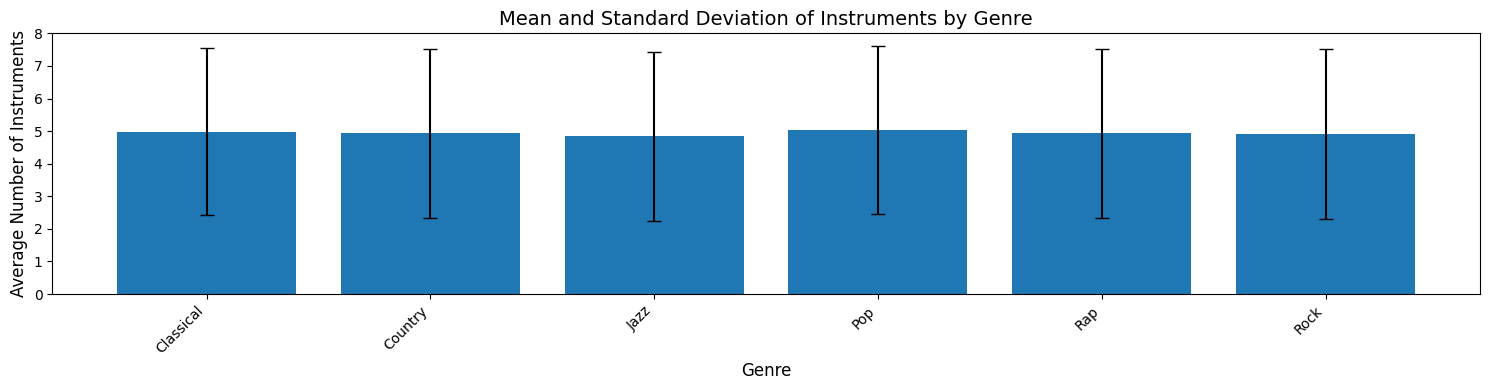

In [237]:
# Let us play with Genre for a bit
# Let us visualize variability of  Number of Instruments used for different Genre
tdf=df.groupby('Genre').agg({'NumInstruments':['mean','std']})
tdf.columns = ['mean','std']
plt.figure(figsize=(15,4))
plt.bar(tdf.index, tdf['mean'],yerr=tdf['std'],capsize=5)
plt.title('Mean and Standard Deviation of Instruments by Genre',fontsize=14)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Average Number of Instruments',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

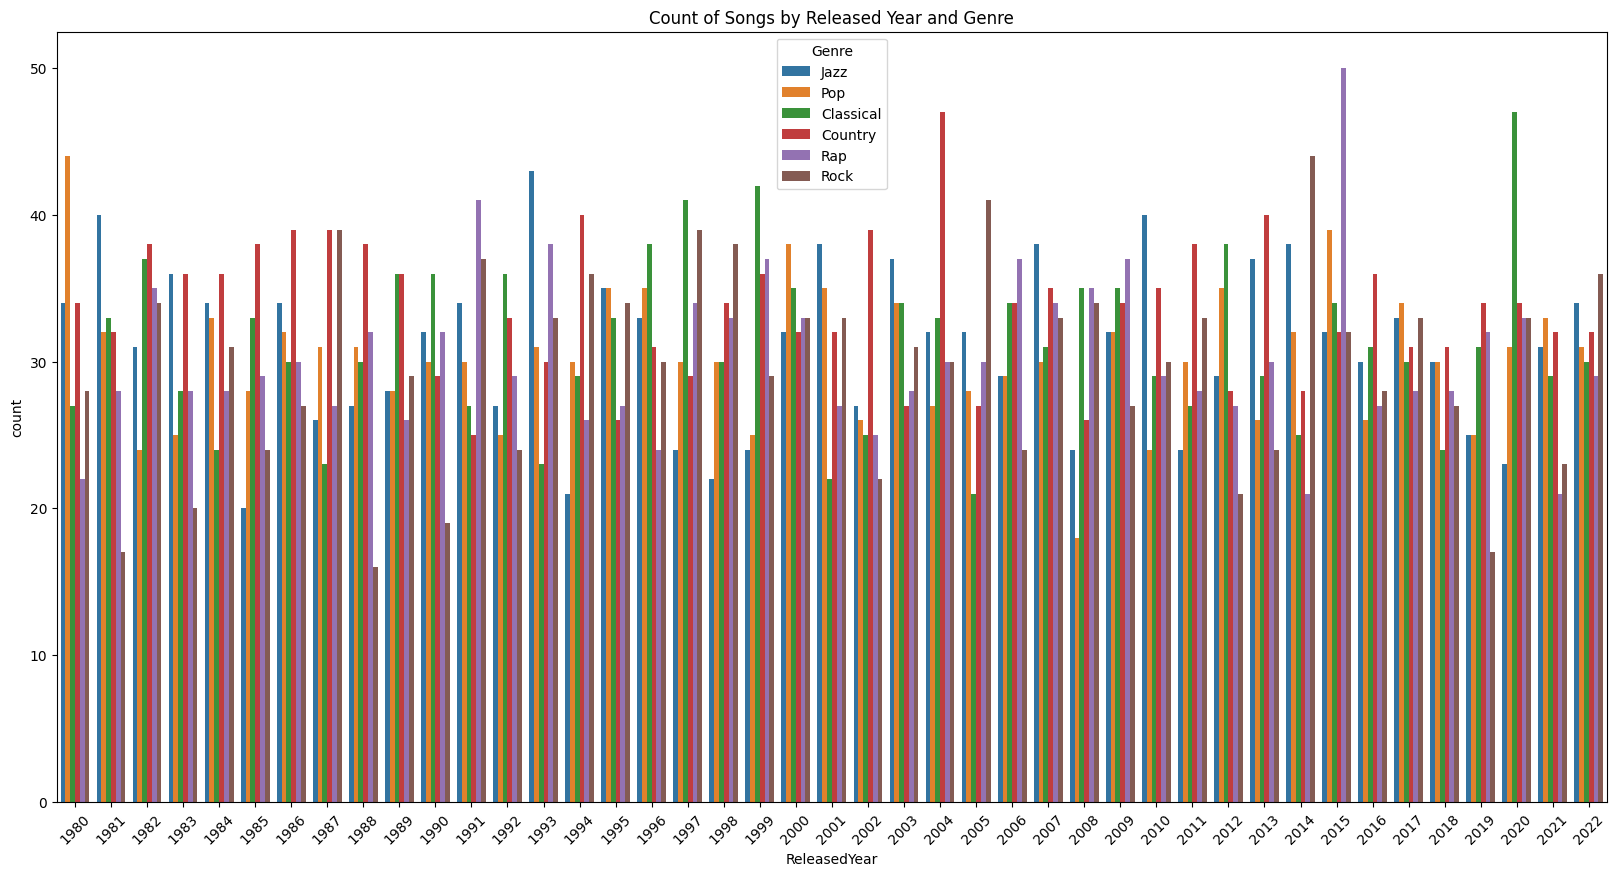

In [238]:
# let us see relationship between release years of songs and genre
plt.figure(figsize=(20, 10))
sns.countplot(data=df,x='ReleasedYear',hue='Genre')
plt.title('Count of Songs by Released Year and Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()
#looks a bit messy :(  , let us plot a stacked bar plot instead

<Figure size 1500x1000 with 0 Axes>

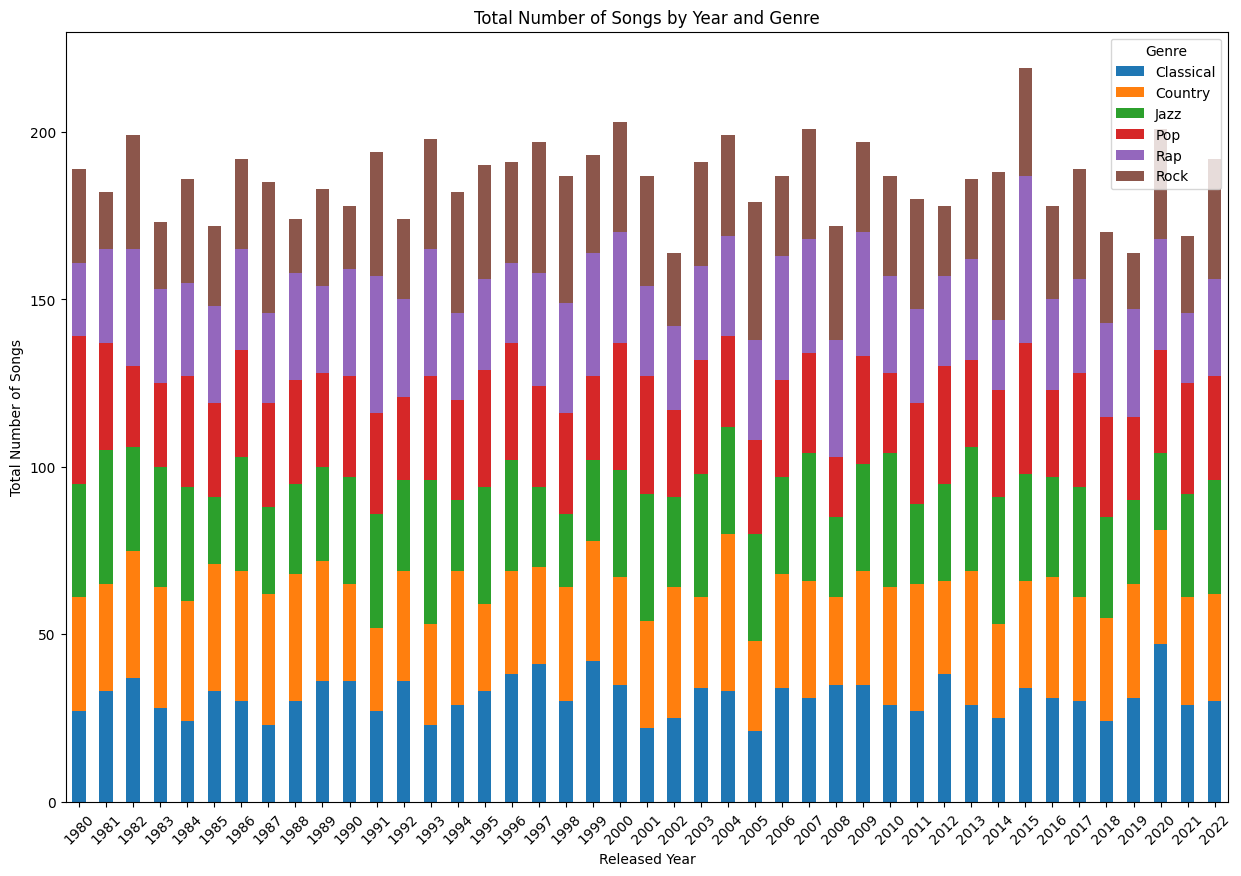

In [239]:
plt.figure(figsize=(15, 10))
genre_counts=df.groupby(['ReleasedYear','Genre']).size().unstack()
genre_counts.plot(kind='bar',stacked=True,figsize=(15, 10))
plt.title('Total Number of Songs by Year and Genre')
plt.xlabel('Released Year')
plt.ylabel('Total Number of Songs')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

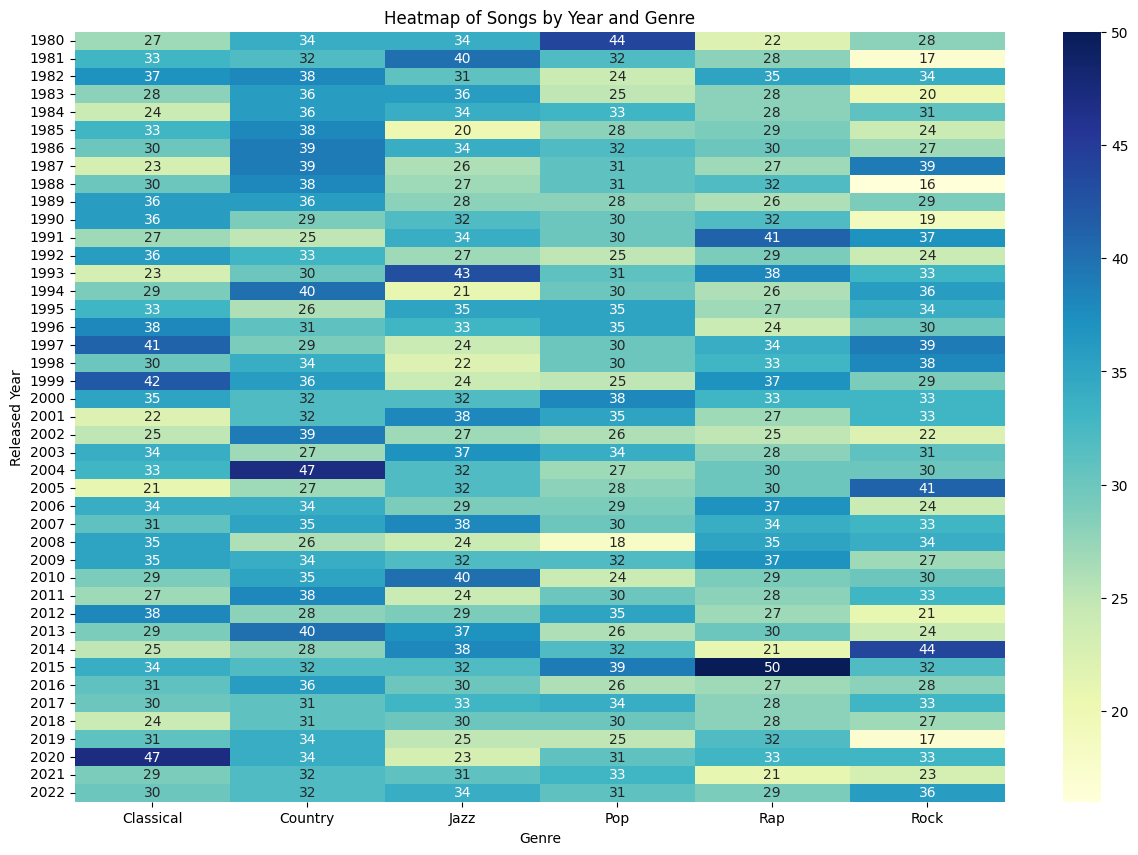

In [240]:
# Let us look at which genre was popular by year
plt.figure(figsize=(15,10))
genre_counts = df.groupby(['ReleasedYear','Genre']).size().unstack().fillna(0)
sns.heatmap(genre_counts, cmap='YlGnBu',annot=True,fmt=".0f")
plt.title('Heatmap of Songs by Year and Genre')
plt.xlabel('Genre')
plt.ylabel('Released Year')
plt.show()

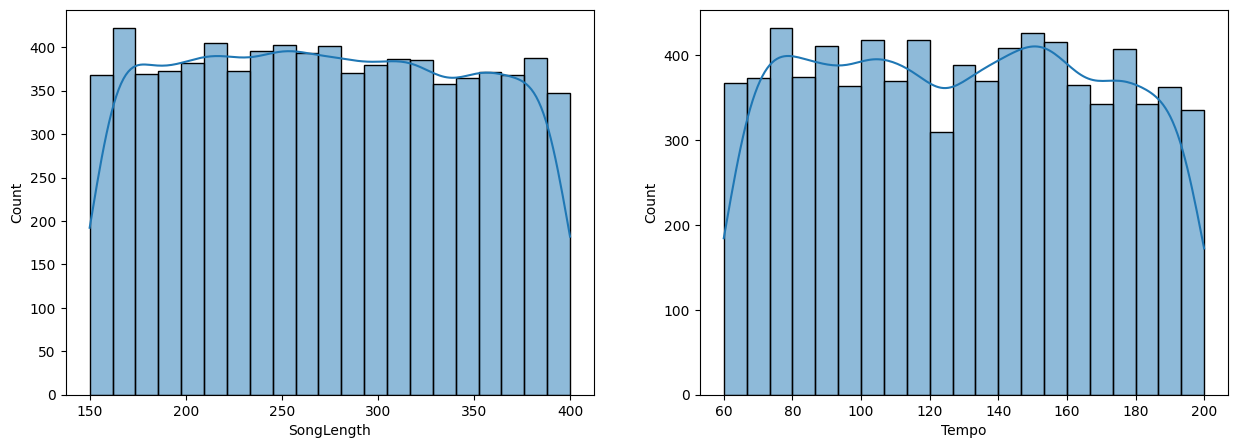

In [241]:
# We have some idea about how popularity is distributes, how year and genre are related and how number of instruments are related to genre
# Now let us look at how our song length as well as tempo is distributed and pheraps we can get an idea to create a new feature by combining it with Genre
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x='SongLength',kde=True,ax=ax[0])
sns.histplot(data=df,x='Tempo',kde=True,ax=ax[1])
plt.show()

C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_1972\4174434047.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(x=tdf.index,y='SongLength',data=tdf,palette='magma')
C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_1972\4174434047.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(x=tdf.index,y='Tempo',data=tdf,palette='magma')


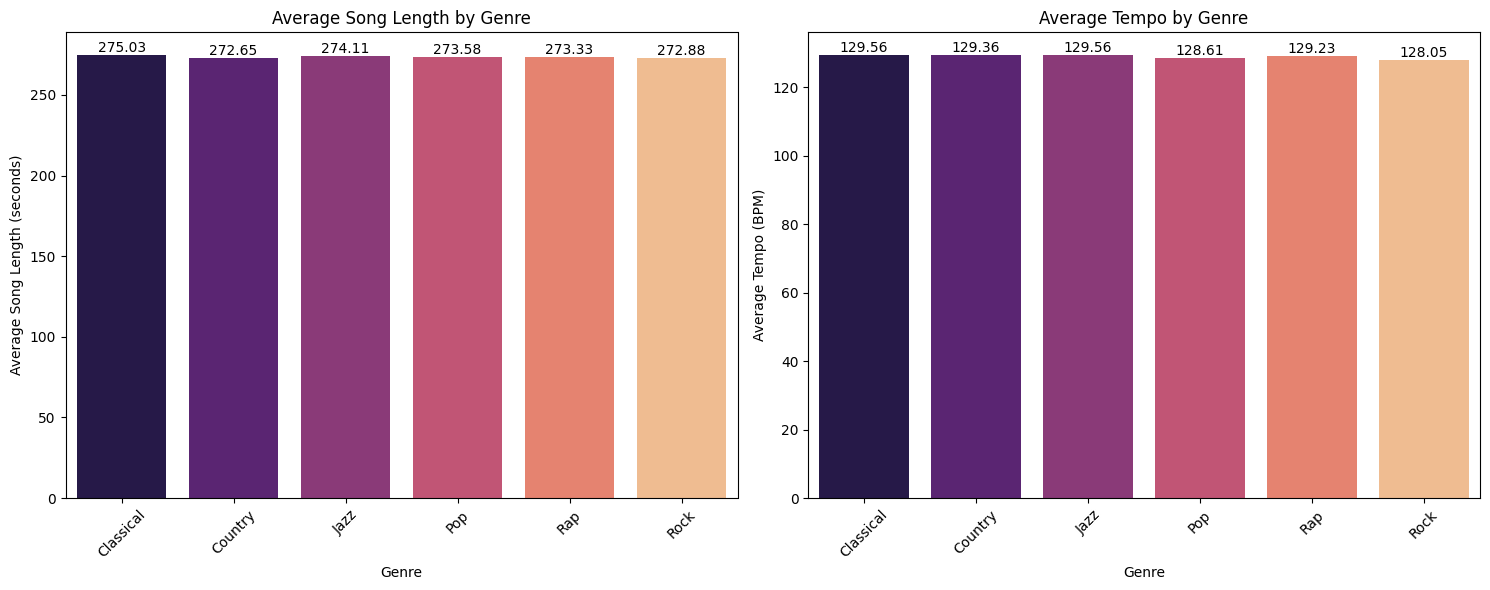

In [242]:
# Let us visualize the average tempo and average Songlength for each type of Genre
tdf=df.groupby('Genre').agg({'SongLength':'mean','Tempo':'mean'})
index = ['Classical','Country','Jazz','Pop',  'Rap','Rock']
tdf=pd.DataFrame(tdf,index=index)
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax1=sns.barplot(x=tdf.index,y='SongLength',data=tdf,palette='magma')
plt.title('Average Song Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Song Length (seconds)')
plt.xticks(rotation=45)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.subplot(1,2,2)
ax2=sns.barplot(x=tdf.index,y='Tempo',data=tdf,palette='magma')
plt.title('Average Tempo by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Tempo (BPM)')
plt.xticks(rotation=45)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')


plt.tight_layout()
plt.show()

****
## Data Preprocessing ##
****

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


In [244]:
# cheking for null values and confirming
df.isnull().any()

SongLength        False
NumInstruments    False
Genre             False
Tempo             False
LyricalContent    False
ReleasedYear      False
Popularity        False
dtype: bool

In [245]:
# Let us encode the categorical variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

**Feature Engineering:**

**Ideas for feature Engineering which can be implemented:**

1. Song Length categories (short,medium and long)
2. Tempo categories (slow,moderate and fast)
3. We can normalize our target variable and create a new feature (MIGHT LEAD TO DATA LEAK)
4. Age of Song
5. Relative Song Length
6. Tempo to length ratio
7. Released Decade
8. Tempo Variability
9. Lyrical Density

and so on....

In this notebook I will be using Age of Song and Temp to length ratio

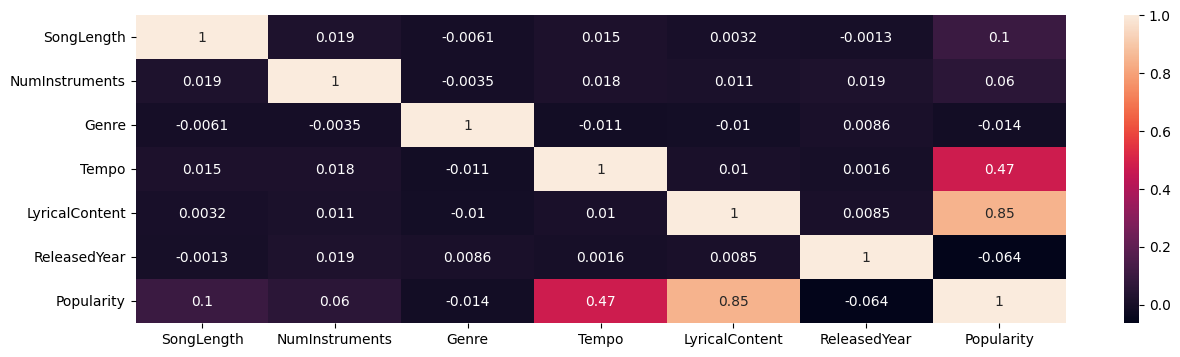

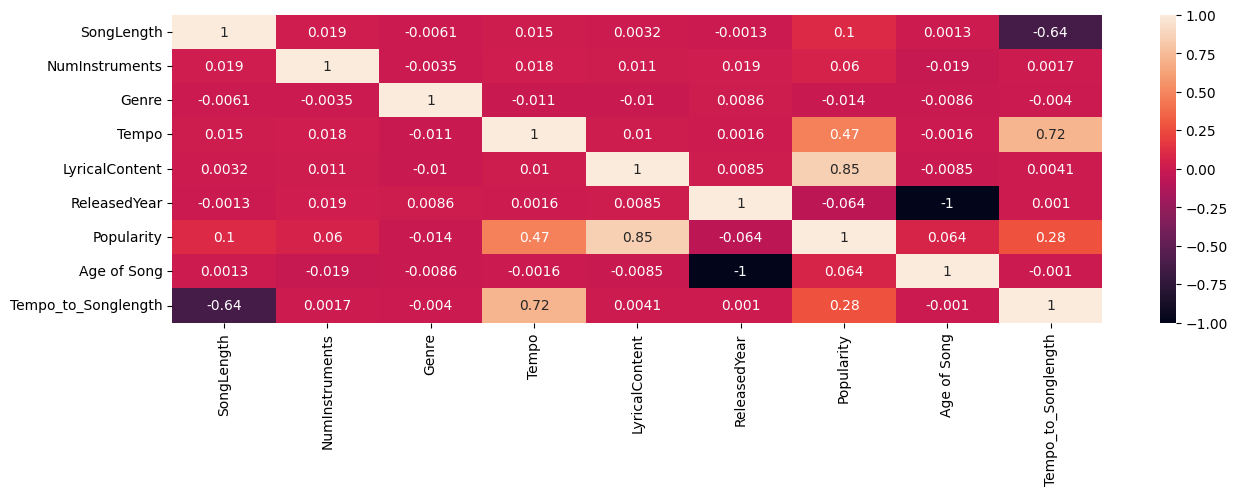

In [246]:
#Before adding the features
plt.figure(figsize=(15,4))
sns.heatmap(df.corr(),annot=True)
plt.show()
#After adding the new features
df['Age of Song']=2024-df['ReleasedYear']
df['Tempo_to_Songlength']=df['Tempo']/df['SongLength']
plt.figure(figsize=(15,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [247]:
# Let us see how features are related to the target variable using Mutual Information
from sklearn.feature_selection import mutual_info_regression
tdf=df.copy()
x=df.drop(columns='Popularity')
y=df['Popularity']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

               Feature  Mutual Information
0       LyricalContent            0.631846
1                Tempo            0.153073
2  Tempo_to_Songlength            0.058871
3           SongLength            0.014115
4                Genre            0.005844
5         ReleasedYear            0.002198
6          Age of Song            0.001352
7       NumInstruments            0.000893


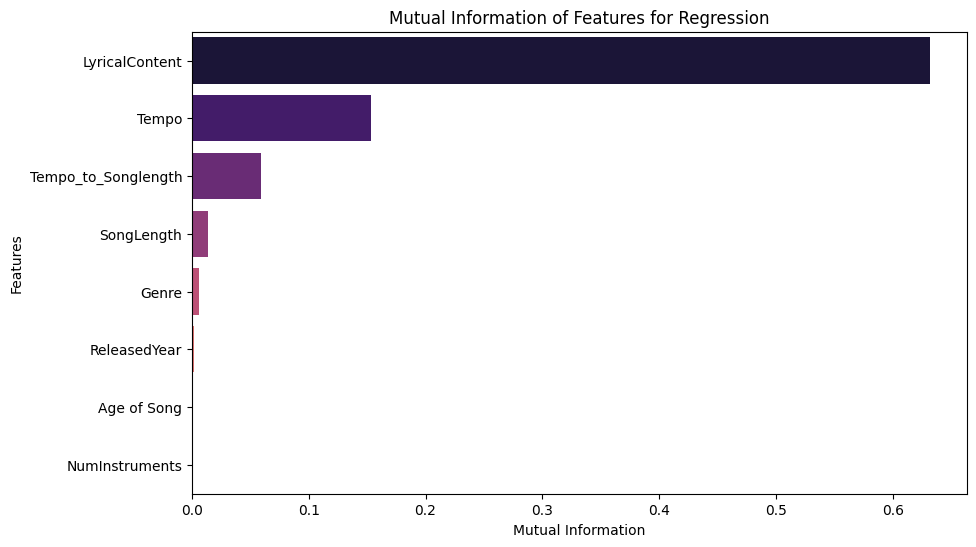

In [248]:
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,hue='Feature',palette='magma')
plt.title('Mutual Information of Features for Regression')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

****
## Data Preperation ##
****

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
x=df.drop(columns='Popularity')
y=df['Popularity']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)  #Splitting the dataset into 75% training and the rest 25% testing

****
## Models ##
****

In [251]:
#importing
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [252]:
r2_t=[]  #storing training r2 scores
r2=[]    #storing testing r2 scores
mse_t=[] #storing training mean squared errors
mse=[]   #storing testing mean squared errors

## Models - Linear Regression ##

In [253]:
# Standardizing the values
ss=StandardScaler()
tx_t=x_t.copy()
tx_te=x_te.copy()
tx_t=ss.fit_transform(tx_t)
tx_te=ss.transform(tx_te)

In [254]:
reg=LinearRegression()
reg.fit(tx_t,y_t)
pred_t=reg.predict(tx_t)
pred=reg.predict(tx_te)

In [255]:
r2_t.append(r2_score(y_t,pred_t))
r2.append(r2_score(y_te,pred))
mse_t.append(mean_squared_error(y_t,pred_t))
mse.append(mean_squared_error(y_te,pred))

## Models - Decision Tree Regressor ##

In [256]:
dt=DecisionTreeRegressor()
path=dt.cost_complexity_pruning_path(x_t,y_t) 
alphas=path.ccp_alphas 
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,n_jobs=-1,scoring='r2',cv=10)  # Finding Best Alpha
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.01778307784191289}
0.9033538186727406


In [257]:
dt=DecisionTreeRegressor(ccp_alpha=best_alpha)
# Hyper Parameter Tuning -> We can use more parameters, descriptions of each paramter is available in the Decision Tree Documentation
params={'criterion':['poisson','squared_error'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,scoring='r2',random_state=42,n_jobs=-1,cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': None, 'criterion': 'squared_error'}
0.9195038685898016


In [258]:
pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)  

In [259]:
r2_t.append(r2_score(y_t,pred1_t))
r2.append(r2_score(y_te,pred1))
mse_t.append(mean_squared_error(y_t,pred1_t))
mse.append(mean_squared_error(y_te,pred1))

## Models - Random Forest Regressor ##

In [260]:
rf=RandomForestRegressor()
params={'criterion':['poisson','squared_error'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
        'max_features':['sqrt','log2',None],'n_estimators':[500]}
nrf=RandomizedSearchCV(rf,param_distributions=params,scoring='r2',random_state=42,n_jobs=-1,cv=10)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 500, 'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': None, 'criterion': 'squared_error'}
0.9359729304295585


In [261]:
pred2_t=nrf.predict(x_t)
pred2=nrf.predict(x_te)

In [262]:
r2_t.append(r2_score(y_t,pred2_t))
r2.append(r2_score(y_te,pred2))
mse_t.append(mean_squared_error(y_t,pred2_t))
mse.append(mean_squared_error(y_te,pred2))

## Models - AdaBoost Regressor ##

In [263]:
ada=AdaBoostRegressor()
params={
    'n_estimators': [300],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='r2')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 300, 'learning_rate': 1.98}
0.9276978671044775


In [264]:
pred3_t=nada.predict(x_t)
pred3=nada.predict(x_te)

In [265]:
r2_t.append(r2_score(y_t,pred3_t))
r2.append(r2_score(y_te,pred3))
mse_t.append(mean_squared_error(y_t,pred3_t))
mse.append(mean_squared_error(y_te,pred3))

## Training and Testing Scores ##

In [274]:
mods=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor']
s_t=pd.DataFrame({'Regression Algorithms':mods,'Training R2 Score':r2_t,'Training Mean Squared Error':mse_t})
s=pd.DataFrame({'Regression Algorithms':mods,'Testing R2 Score':r2,'Testing Mean Squared Error':mse})
s_t=s_t.sort_values(by=['Training R2 Score','Training Mean Squared Error'],ascending=False).reset_index(drop=True)
s=s.sort_values(by=['Testing R2 Score','Testing Mean Squared Error'],ascending=False).reset_index(drop=True)

In [275]:
s_t

,Regression Algorithms,Training R2 Score,Training Mean Squared Error
0,Random Forest Regressor,0.951066,22.391993
1,Decision Tree Regressor,0.945453,24.960380
2,Linear Regression,0.945197,25.077752
3,AdaBoost Regressor,0.931622,31.289569


In [276]:
s

,Regression Algorithms,Testing R2 Score,Testing Mean Squared Error
0,Random Forest Regressor,0.948740,22.613119
1,Linear Regression,0.942697,25.279182
2,AdaBoost Regressor,0.924364,33.366696
3,Decision Tree Regressor,0.916749,36.725743


# Residual Plots #

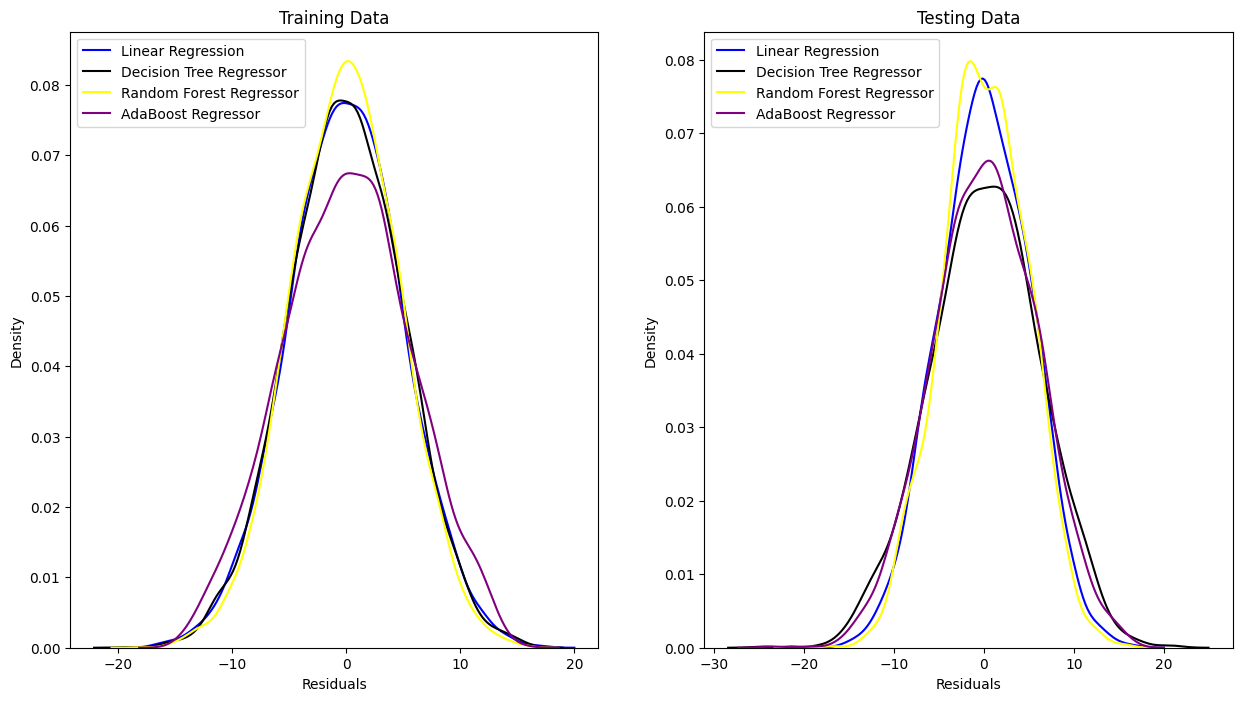

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.kdeplot(y_t - pred_t, label='Linear Regression', color='blue',ax=axes[0])
sns.kdeplot(y_t - pred1_t, label='Decision Tree Regressor', color='black',ax=axes[0])
sns.kdeplot(y_t - pred2_t, label='Random Forest Regressor', color='yellow',ax=axes[0])
sns.kdeplot(y_t - pred3_t, label='AdaBoost Regressor', color='purple',ax=axes[0])
axes[0].legend()
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')
axes[0].set_title('Training Data')
sns.kdeplot(y_te - pred, label='Linear Regression', color='blue',ax=axes[1])
sns.kdeplot(y_te - pred1, label='Decision Tree Regressor', color='black',ax=axes[1])
sns.kdeplot(y_te - pred2, label='Random Forest Regressor', color='yellow',ax=axes[1])
sns.kdeplot(y_te - pred3, label='AdaBoost Regressor', color='purple',ax=axes[1])
axes[1].legend()
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].set_title('Testing Data')
plt.show()

## Conclusions ##

**Training Data:**
1. Random Forest Regressor has slightly less spread than Linear Regression and Decision Tree Regressor, suggesting better performance
2. Linear Regression and Decision Tree Regressor demonstrate nearly identical residual distributions, suggesting that both models have similar errors on the training data.
3. AdaBoost Regressor has a shape similar to the Linear and Decision Tree Regressors but with slightly more spread, implying marginally worse performance.

**Testing Data:**

1. Random Forest Regressor continues to perform well, with a sharper peak near zero residuals, suggesting higher accuracy in predictions.
2. Linear Regression has almost identical peak and spread to Random Forest Regressor but very slightly lags behind Random Forest Regressor.
3. Decision Tree Regressor and AdaBoost Regressor display similar residual patterns, though the Decision Tree model slightly lags behind.

**Conclusion:**
1. The Random Forest Regressor is the best model based on both training and testing metrics, offering the best balance between bias and variance.
2. Linear Regression performs well but is slightly outperformed by Random Forest.
3. AdaBoost and Decision Tree Regressors exhibit higher errors, with both showing clear signs of Overfitting :(.

**Kindly provide suggestions and feedback to improve this Notebook**

**Kindly Upvote if you liked this notebook and  has helped you in some way :)**